1. Mounting Data

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


2. Importing Relevant Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

3. Defining Path and Training Data

In [ ]:
path = '/gdrive/My Drive/ML1 Course1 Sept 2020/Assignments/Data/'

In [ ]:
train_data = pd.read_csv(path + 'Chennai_house_price_multivariate_train.csv')
train_data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


4. Checking for and Handling Null Data

In [ ]:
train_data = train_data.fillna({'N_BEDROOM': train_data['N_BEDROOM'].mean(), 'N_BATHROOM': train_data['N_BATHROOM'].mean(), 'QS_OVERALL': train_data['QS_OVERALL'].mean()})
train_data.isnull().sum(axis=0)

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

5. Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
train_data["AREA"] = labelencoder.fit_transform(train_data["AREA"])
train_data["DATE_SALE"] = labelencoder.fit_transform(train_data["DATE_SALE"])
train_data["SALE_COND"] = labelencoder.fit_transform(train_data["SALE_COND"])
train_data["PARK_FACIL"] = labelencoder.fit_transform(train_data["PARK_FACIL"])
train_data["DATE_BUILD"] = labelencoder.fit_transform(train_data["DATE_BUILD"])
train_data["BUILDTYPE"] = labelencoder.fit_transform(train_data["BUILDTYPE"])
train_data["UTILITY_AVAIL"] = labelencoder.fit_transform(train_data["UTILITY_AVAIL"])
train_data["STREET"] = labelencoder.fit_transform(train_data["STREET"])
train_data["MZZONE"] = labelencoder.fit_transform(train_data["MZZONE"])
train_data = train_data.drop(columns=["PRT_ID"])
train_data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,12,1004,310,131,1.0,1.0,3,1,2,2731,0,1,4,0,4.0,3.9,4.9,4.330,380000,144400,7600000
1,4,1986,1745,26,2.0,1.0,5,1,0,4226,0,1,0,3,4.9,4.2,2.5,3.765,760122,304049,21717770
2,0,909,288,70,1.0,1.0,3,1,2,1511,0,2,0,4,4.1,3.8,2.2,3.090,421094,92114,13159200
3,15,1855,1117,14,3.0,2.0,5,4,0,3300,2,4,4,2,4.7,3.9,3.6,4.010,356321,77042,9630290
4,12,1226,442,84,1.0,1.0,3,1,2,2406,2,1,0,1,3.0,2.5,4.1,3.290,237000,74063,7406250


6. Normalising and Scaling the Data

In [ ]:
data = (train_data - train_data.mean())/(train_data.max() - train_data.min())
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,0.208011,-0.189037,-0.383064,0.156984,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,-0.028509,-0.500492,-0.378042,0.56745,-0.663469,0.160843,0.130919,0.471567,0.278366,0.003354,0.006922,-0.153177
1,-0.291989,0.301963,0.129986,-0.368016,0.120990,-0.21326,0.327824,-0.375721,-0.504712,0.228939,-0.500492,-0.378042,-0.43255,-0.063469,0.460843,0.230919,-0.328433,0.088130,0.419815,0.332504,0.503144
2,-0.541989,-0.236537,-0.390929,-0.148016,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,-0.238600,-0.500492,-0.128042,-0.43255,0.136531,0.194176,0.097585,-0.428433,-0.139143,0.048377,-0.099708,0.105265
3,0.395511,0.236463,-0.094540,-0.428016,0.454324,0.78674,0.327824,-0.000721,-0.504712,0.069476,0.499508,0.371958,0.56745,-0.263469,0.394176,0.130919,0.038233,0.170622,-0.022588,-0.130445,-0.058791
4,0.208011,-0.078037,-0.335870,-0.078016,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,-0.084476,0.499508,-0.378042,-0.43255,-0.463469,-0.172490,-0.335748,0.204900,-0.071803,-0.153316,-0.136520,-0.162184


7. Dropping Unwanted Features and Seperating X and Y for Training Data

In [ ]:
x = data.drop(columns= ["SALES_PRICE"])
y = data.iloc[:, 20:21]

8. Adding Bias term

In [ ]:
x.insert(0, 'Bias', 1)
x.head()

,Bias,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,1,0.208011,-0.189037,-0.383064,0.156984,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,-0.028509,-0.500492,-0.378042,0.56745,-0.663469,0.160843,0.130919,0.471567,0.278366,0.003354,0.006922
1,1,-0.291989,0.301963,0.129986,-0.368016,0.120990,-0.21326,0.327824,-0.375721,-0.504712,0.228939,-0.500492,-0.378042,-0.43255,-0.063469,0.460843,0.230919,-0.328433,0.088130,0.419815,0.332504
2,1,-0.541989,-0.236537,-0.390929,-0.148016,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,-0.238600,-0.500492,-0.128042,-0.43255,0.136531,0.194176,0.097585,-0.428433,-0.139143,0.048377,-0.099708
3,1,0.395511,0.236463,-0.094540,-0.428016,0.454324,0.78674,0.327824,-0.000721,-0.504712,0.069476,0.499508,0.371958,0.56745,-0.263469,0.394176,0.130919,0.038233,0.170622,-0.022588,-0.130445
4,1,0.208011,-0.078037,-0.335870,-0.078016,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,-0.084476,0.499508,-0.378042,-0.43255,-0.463469,-0.172490,-0.335748,0.204900,-0.071803,-0.153316,-0.136520


9. Splitting Test and Train Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train = np.matrix(x_train)
y_train = np.matrix(y_train)
theta = np.matrix(np.zeros(21))
print(theta.shape, x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1, 21) (5331, 21) (5331, 1) (1778, 21) (1778, 1)


10. Compute Error & Gradient descent functions

In [ ]:
def ComputeError(x, y, theta):
    variable = np.power(((x * theta.T) - y), 2)
    return np.sum(variable)/(2*len(x))

In [ ]:
ComputeError(x_train, y_train, theta)

0.015386700124305572

In [ ]:
learn_rate = 0.003
iters = 50000

def gradient_descent(x, y, theta, learn_rate, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = theta.shape[1]
    cost = []

    for i in range(iters):
        error = (x*theta.T)-y

        for j in range(parameters):
            gradient = np.multiply(error, x[:, j])
            temp[0, j] = theta[0, j] - ((learn_rate/len(x)) * np.sum(gradient))
        
        theta = temp
        cost_iter = ComputeError(x, y, theta)
        cost.append(cost_iter)
    
    return theta, cost

In [ ]:
new_theta, cost = gradient_descent(x_train, y_train, theta, learn_rate, iters)
print(new_theta)
print(cost)

[[-0.00089679 -0.0830073   0.19390152  0.00282618  0.00311239 -0.12229306
  -0.06215789  0.21543537 -0.01794477  0.02879866 -0.00239391 -0.11109355
  -0.00980068 -0.00889495  0.10408134  0.00506682 -0.00200325  0.00232896
   0.00584082  0.41513853  0.1113128 ]]
[0.01537437236737807, 0.015362059669458878, 0.01534976200888039, 0.015337479364009773, 0.015325211713248904, 0.015312959035034294, 0.015300721307837068, 0.01528849851016284, 0.01527629062055171, 0.015264097617578175, 0.015251919479851073, 0.015239756186013526, 0.015227607714742866, 0.015215474044750597, 0.015203355154782314, 0.015191251023617658, 0.015179161630070239, 0.015167086952987597, 0.015155026971251123, 0.015142981663776015, 0.015130951009511201, 0.015118934987439303, 0.015106933576576546, 0.015094946755972737, 0.015082974504711171, 0.015071016801908593, 0.015059073626715129, 0.015047144958314235, 0.015035230775922637, 0.01502333105879026, 0.015011445786200188, 0.014999574937468596, 0.014987718491944687, 0.01497587642901

11. Analysing Cost per Epoch

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Error vs Iterations')

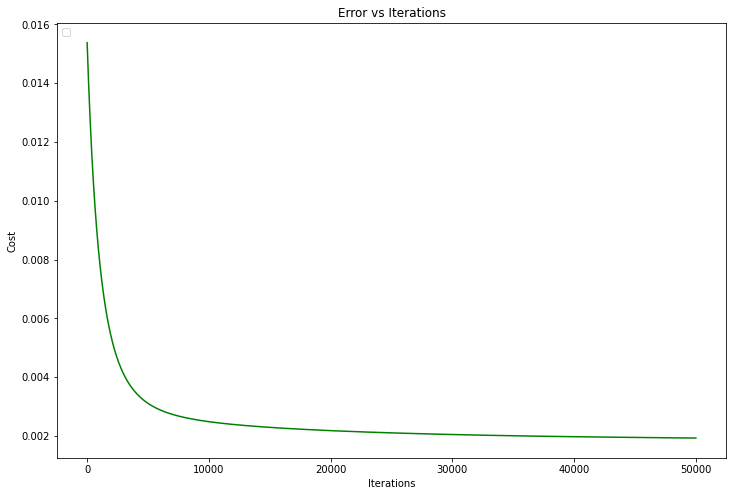

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'g')
ax.legend(loc=2)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Iterations')

12. Accuracy

In [ ]:
train_price = x_train * new_theta.T
x_test = np.matrix(x_test)
y_test = np.matrix(y_test)
test_price = x_test * new_theta.T

In [ ]:
from sklearn.metrics import mean_absolute_error
train_error = mean_absolute_error(train_price, y_train)
train_accuracy = 1 - train_error

print('Train Error = {} %'.format((round(train_error*100,2))))
print('Train Accuracy = {} %'.format((round(train_accuracy*100,2))))

Train Error = 5.01 %
Train Accuracy = 94.99 %


In [ ]:
from sklearn.metrics import mean_absolute_error

test_error = mean_absolute_error(test_price, y_test)
test_accuracy = 1 - test_error

print('Test Error = {} %'.format((round(test_error*100,2))))
print('Test Accuracy = {} %'.format((round(test_accuracy*100,2))))

Test Error = 4.95 %
Test Accuracy = 95.05 %
